In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import cv2
import numpy

TensorFlow is already loaded. Please restart the runtime to change versions.


In [2]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) 

In [0]:
model = Sequential()

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [6]:
model.fit(x=x_train,y=y_train,epochs=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1991 - acc: 0.9398
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0838 - acc: 0.9743
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0553 - acc: 0.9821
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0436 - acc: 0.9857
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0330 - acc: 0.9890


In [7]:
model.evaluate(x=x_test,y=y_test)
prediction = model.predict(x_test)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.1069 - acc: 0.9728


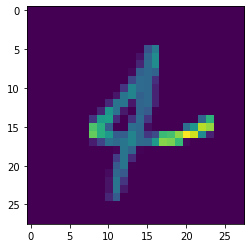

In [8]:
plt.imshow(x_test[300])

In [11]:
numpy.argmax(prediction[300])

4

In [12]:
x = x_test[300]
x = numpy.expand_dims(x, axis=0)
numpy.argmax(model.predict(x))

4